In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, matthews_corrcoef
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

from tqdm import tqdm

In [54]:
train_df = pd.read_csv('../Data/2020-train.csv')

In [55]:
train_df.head()

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
0,d7e3acce,Right,32678d8d,Right,a4833794,f88d09f4,83cdf9ff,3,1,0.0,...,86.024200,-4.37258,1.429580,0.404622,-0.059343,55,6.03322,FA,InPlay,42fce2f6
1,44ec1bf5,Right,81d51733,Left,f60d6ea5,b67d862c,a126f66f,6,2,0.0,...,89.458199,-4.90467,-2.148410,0.385719,-2.148680,55,6.23380,FA,InPlay,3e9cda86
2,44d87ee6,Left,8eefccb7,Right,a9b8b538,13993d26,9db4e46f,5,2,2.0,...,75.593597,-6.00728,-0.122044,0.463953,1.300450,55,6.14750,CH,BallCalled,f129a6cd
3,ff6adae0,Right,8f8ab5af,Right,e569ec39,0d8ba4bb,bbbfd290,5,1,2.0,...,76.396400,-9.50640,-2.581980,0.458471,-1.659590,55,6.60043,CU,InPlay,03e9bc05
4,c70c96e5,Right,10874746,Right,a5ce1bf6,94a4c552,75087ec8,8,1,2.0,...,83.215302,-4.53233,-0.268188,0.415965,-1.526170,55,4.77332,FA,StrikeCalled,48feb675


In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582205 entries, 0 to 582204
Data columns (total 36 columns):
pitcher_id             582205 non-null object
pitcher_side           582205 non-null object
batter_id              582205 non-null object
batter_side            582205 non-null object
stadium_id             582205 non-null object
umpire_id              582205 non-null object
catcher_id             582205 non-null object
inning                 582205 non-null int64
top_bottom             582205 non-null int64
outs                   582053 non-null float64
balls                  582205 non-null int64
strikes                582205 non-null int64
release_speed          582093 non-null float64
vert_release_angle     582093 non-null float64
horz_release_angle     582093 non-null float64
spin_rate              573194 non-null float64
spin_axis              582093 non-null float64
tilt                   580953 non-null object
rel_height             582093 non-null float64
rel_side    

## Data Cleaning

In [57]:
train_df[train_df['release_speed'].isnull()]

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
3405,8759809c,Right,00bde845,Right,80756f45,9c6cbb5e,9c6cbb5e,5,2,0.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,StrikeCalled,1d66612a
12334,f6d227a5,Right,69426d29,Left,a3f610ed,9c6cbb5e,9c6cbb5e,5,2,2.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,InPlay,beb842a8
13895,b74a40d9,Right,00bde845,Right,a3f610ed,9c6cbb5e,9c6cbb5e,3,1,1.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,InPlay,e271ef9d
16260,47032f76,Left,20bf9444,Right,c9712626,9c6cbb5e,9c6cbb5e,16,2,1.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,FA,InPlay,49f26761
17008,96a1cebe,Right,76c0475e,Right,a5ce1bf6,9c6cbb5e,9c6cbb5e,9,2,0.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,SL,BallCalled,ca8c6341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564267,b3336756,Left,bbbfd290,Right,9b5daeaf,9c6cbb5e,9c6cbb5e,9,1,2.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,CH,InPlay,8d21a585
564950,c3ededfb,Right,8f8ab5af,Right,b20853fa,9c6cbb5e,9c6cbb5e,1,1,2.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,BallCalled,142a06b3
567947,ad6bf2a7,Right,066e327d,Right,fe6b0f40,9c6cbb5e,9c6cbb5e,5,2,0.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,StrikeCalled,5326a5f6
571936,0a606b2d,Right,336a9f05,Left,1a39a252,9c6cbb5e,9c6cbb5e,9,1,1.0,...,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,BallCalled,3c4e2fe4


In [58]:
train_df = train_df.drop(train_df[train_df['release_speed'].isnull()].index)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582093 entries, 0 to 582204
Data columns (total 36 columns):
pitcher_id             582093 non-null object
pitcher_side           582093 non-null object
batter_id              582093 non-null object
batter_side            582093 non-null object
stadium_id             582093 non-null object
umpire_id              582093 non-null object
catcher_id             582093 non-null object
inning                 582093 non-null int64
top_bottom             582093 non-null int64
outs                   581941 non-null float64
balls                  582093 non-null int64
strikes                582093 non-null int64
release_speed          582093 non-null float64
vert_release_angle     582093 non-null float64
horz_release_angle     582093 non-null float64
spin_rate              573194 non-null float64
spin_axis              582093 non-null float64
tilt                   580953 non-null object
rel_height             582093 non-null float64
rel_side    

In [59]:
train_df[train_df['outs'].isnull()]

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
6689,a6118212,Right,5dce2d1c,Right,99faafae,c16da957,fd37f21c,7,1,NaN,...,75.911797,-10.27540,-1.215380,0.457509,-1.44079,55,6.19782,SL,StrikeSwinging,8f7e287a
14410,5b740fab,Left,e2e2a336,Right,d0e0eb76,c9752165,5a42193e,5,2,NaN,...,72.887398,-7.79636,0.764407,0.476133,3.30888,55,5.70064,CH,BallCalled,fdaab946
19161,161160dd,Right,f338e9d3,Left,1a39a252,c229ef9e,41ac8158,4,2,NaN,...,84.766296,-5.21754,0.053372,0.417402,-1.30256,55,5.76697,FA,BallCalled,479ee407
23843,f6d227a5,Right,e9553a98,Right,d0e0eb76,26a1bb6b,0ffec018,6,1,NaN,...,74.321999,-9.18817,-4.715870,0.470084,-2.66638,55,6.70092,CH,StrikeSwinging,b01234ef
27156,264562c6,Right,29d12af7,Left,a5ce1bf6,9806dfbc,a3a2988b,11,2,NaN,...,86.122299,-7.29354,-4.722650,0.411571,-2.93787,55,6.37265,SL,StrikeSwinging,f7771432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559476,b3d5c0a9,Right,cf690f2f,Left,0c59f5af,8f1ef267,fa18ff59,5,2,NaN,...,80.375298,-7.07432,-2.223690,0.430519,-1.15777,55,6.08150,SL,FoulBall,d29aa13d
569804,91700130,Right,de9d396f,Left,99faafae,667d5752,41ac8158,7,1,NaN,...,84.243103,-5.38618,0.594491,0.419565,-1.64532,55,6.31180,FA,BallCalled,d711100f
569836,91700130,Right,de9d396f,Left,99faafae,667d5752,41ac8158,7,1,NaN,...,82.846298,-6.36660,-1.029200,0.425654,-1.62191,55,6.24978,FA,StrikeCalled,5f05e674
570351,d5ef78cb,Right,781ec6be,Right,aa998b21,a9ad7586,a3a2988b,6,1,NaN,...,85.266098,-4.60246,-1.696110,0.401914,-1.92533,55,5.80506,FA,StrikeSwinging,24ac5f78


In [60]:
train_df = train_df.drop(train_df[train_df['outs'].isnull()].index)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581941 entries, 0 to 582204
Data columns (total 36 columns):
pitcher_id             581941 non-null object
pitcher_side           581941 non-null object
batter_id              581941 non-null object
batter_side            581941 non-null object
stadium_id             581941 non-null object
umpire_id              581941 non-null object
catcher_id             581941 non-null object
inning                 581941 non-null int64
top_bottom             581941 non-null int64
outs                   581941 non-null float64
balls                  581941 non-null int64
strikes                581941 non-null int64
release_speed          581941 non-null float64
vert_release_angle     581941 non-null float64
horz_release_angle     581941 non-null float64
spin_rate              573044 non-null float64
spin_axis              581941 non-null float64
tilt                   580802 non-null object
rel_height             581941 non-null float64
rel_side    

In [61]:
train_df[train_df['spin_rate'].isnull()]

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
43,4c807a49,Left,210e8d5b,Right,402559d3,4ff102e5,fbc0970f,6,2,2.0,...,77.869301,-6.96547,2.47110,0.444589,2.32704,55,5.75515,SL,InPlay,1769b4d5
148,cb113772,Right,96339e13,Left,aa998b21,c683b9a6,a3a2988b,7,1,0.0,...,73.582497,-9.61581,-2.45899,0.474079,-1.42864,55,5.84820,SL,BallCalled,ef2a6b0e
161,af6d3149,Right,6c43d395,Right,03722f5d,d057fd71,e9aa50df,9,1,1.0,...,76.742798,-6.86927,-3.62681,0.461172,-3.17556,55,4.88357,SL,StrikeCalled,f31fc865
237,eccb6087,Right,08b0b39d,Left,a5ce1bf6,9806dfbc,b1499101,9,1,1.0,...,79.280602,-6.75395,-3.49224,0.438489,-1.96139,55,5.75645,SL,StrikeCalled,3588e119
304,e332e67d,Right,34a8f234,Left,402559d3,fbbea103,e4fac104,5,2,2.0,...,80.649803,-8.90885,-2.33627,0.433380,-1.18638,55,6.42062,SL,InPlay,6fa4b697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581856,00f5fb90,Right,b4efd4bf,Right,f682daed,cac8185e,e4fac104,4,2,1.0,...,77.819801,-8.53157,-2.76430,0.446821,-2.01818,55,5.79492,SL,InPlay,fc151903
581859,fa9b0925,Right,c1ec06e6,Right,5025d8df,7675ce83,054f7d9f,6,1,0.0,...,77.702797,-10.84580,-3.94847,0.452332,-1.45562,55,6.02164,CU,BallCalled,941e91ca
581927,09da5d7a,Left,073c2b16,Right,b20853fa,4db7bcbc,9db4e46f,9,1,0.0,...,76.172997,-8.79066,3.64529,0.459917,2.00739,55,6.51264,SL,StrikeSwinging,3f7dd184
581992,be5181f0,Right,566220c7,Right,03722f5d,a86853a2,5b8927f6,2,2,2.0,...,77.229103,-7.42066,-3.82928,0.458138,-1.49327,55,5.40118,SL,StrikeSwinging,40cc471a


In [62]:
train_df['spin_rate'].describe()

count    573044.000000
mean       2220.693335
std         311.989506
min         362.382996
25%        2072.879883
50%        2238.449951
75%        2400.790039
max        3752.239990
Name: spin_rate, dtype: float64

In [63]:
train_df['spin_rate'].fillna(train_df['spin_rate'].mean(), inplace=True)

In [64]:
train_df['spin_rate'].describe()

count    581941.000000
mean       2220.693335
std         309.595392
min         362.382996
25%        2076.080078
50%        2233.979980
75%        2397.649902
max        3752.239990
Name: spin_rate, dtype: float64

In [65]:
train_df[train_df['tilt'].isnull()]

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
378,cd483725,Right,192899a6,Right,c9712626,1869cf54,00ae6fb5,3,1,1.0,...,73.954399,-9.60881,-1.961030,0.477100,-1.181070,55,6.13692,CU,InPlay,d30f5214
770,22b76a09,Left,d11080ae,Left,5025d8df,598ea1b2,a421b54b,3,2,0.0,...,67.967903,-11.73220,1.604870,0.512340,1.140470,55,6.32628,CU,BallCalled,a7209bc8
1339,cd483725,Right,deb2ab32,Right,0b15e1ca,eb059a22,00ae6fb5,6,2,1.0,...,75.172897,-9.79158,-1.867760,0.471512,-0.749778,55,5.86303,CU,StrikeSwinging,6b05ddc4
2117,28e273c4,Left,4ac005f3,Right,d0d69f32,46051258,4fedda83,3,1,1.0,...,75.375900,-8.49879,2.576980,0.459569,2.623400,55,6.40245,CU,InPlay,3face29a
3399,193d153f,Left,ed874f19,Right,c9712626,eb059a22,4f9cd7f9,4,1,2.0,...,75.718102,-9.39808,2.573850,0.462214,2.150780,55,6.07629,CU,StrikeSwinging,e1c3703d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580815,98eaf8b2,Right,f57085ec,Right,99faafae,373947e5,ccd72da8,9,2,2.0,...,79.889999,-8.93767,-1.194220,0.435881,-1.759100,55,6.48687,CU,StrikeSwinging,672aa57b
581637,44ec1bf5,R,b3dac04c,L,cfe02944,aea4dd5a,a126f66f,6,2,1.0,...,88.644798,-5.31458,-2.812660,0.390148,-2.398420,55,6.25742,FA,BallCalled,9e8fb97a
581716,60a6f8df,Right,cddcbd8f,Left,0faa3b2d,4581c636,a421b54b,7,1,0.0,...,79.617599,-6.18068,-2.975590,0.435664,-2.043060,55,5.01476,SL,StrikeCalled,1d36d6f5
581733,f45c0602,Right,ad84b429,Left,fe6b0f40,bb04ea23,dc18f830,1,1,2.0,...,82.575500,-5.96087,-0.656144,0.416289,-2.912520,55,5.64645,CH,FoulBall,2e8f759b


In [66]:
train_df = train_df.drop(train_df[train_df['tilt'].isnull()].index)

In [67]:
train_df[train_df['pitch_type'].isnull()]

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
634,bff0f759,Left,192899a6,Right,d0d69f32,9c6cbb5e,9c6cbb5e,5,2,0.0,...,67.892998,-7.08524,0.721203,0.516315,2.17234,55,6.50402,NaN,StrikeCalled,34257ee5
3126,900e6090,Right,699983d6,Left,78aaa563,9c6cbb5e,9c6cbb5e,8,2,1.0,...,81.340797,-5.03602,-2.062410,0.432663,-2.91834,55,5.70209,NaN,InPlay,972b06d9
3263,7bdd4794,Right,44924919,Right,83508f28,9c6cbb5e,9c6cbb5e,9,1,0.0,...,86.714600,-3.29493,-1.750810,0.402108,-1.73126,55,5.63128,NaN,BallCalled,44187be2
3485,7bdd4794,Right,0b8c61b3,Left,83508f28,9c6cbb5e,9c6cbb5e,8,1,1.0,...,85.167503,-4.46310,-1.934850,0.410087,-1.83128,55,5.61829,NaN,StrikeCalled,bf482788
4655,57613174,Right,00bde845,Right,78aaa563,9c6cbb5e,9c6cbb5e,12,1,1.0,...,85.837502,-4.32100,-1.389630,0.402448,-1.74871,55,5.99225,NaN,InPlay,f41ccb06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576312,b48cf592,Right,a3b17b9b,Left,cfe02944,9c6cbb5e,9c6cbb5e,8,2,1.0,...,74.434799,-1.24151,-1.315220,0.465865,-1.59554,55,1.38558,NaN,FoulBall,17b5318a
578590,b4eadd6d,Right,0ae0de45,Right,0a0cfe0d,9c6cbb5e,9c6cbb5e,8,1,1.0,...,87.362602,-4.12619,-1.554950,0.396194,-1.33279,55,6.22610,NaN,FoulBall,d20f5e52
579026,57613174,Right,6b115fe9,Left,fe6b0f40,9c6cbb5e,9c6cbb5e,8,2,0.0,...,77.284798,-7.36536,-1.514690,0.460128,-1.91246,55,5.90440,NaN,FoulBall,528ecba1
579999,d629b647,Right,699983d6,Left,78aaa563,9c6cbb5e,9c6cbb5e,14,2,2.0,...,83.999802,-5.26501,0.381528,0.411825,-1.65040,55,6.96849,NaN,FoulBall,e0d8dea9


In [68]:
train_df = train_df.drop(train_df[train_df['pitch_type'].isnull()].index)
train_df = train_df.reset_index().drop('index', axis=1)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580383 entries, 0 to 580382
Data columns (total 36 columns):
pitcher_id             580383 non-null object
pitcher_side           580383 non-null object
batter_id              580383 non-null object
batter_side            580383 non-null object
stadium_id             580383 non-null object
umpire_id              580383 non-null object
catcher_id             580383 non-null object
inning                 580383 non-null int64
top_bottom             580383 non-null int64
outs                   580383 non-null float64
balls                  580383 non-null int64
strikes                580383 non-null int64
release_speed          580383 non-null float64
vert_release_angle     580383 non-null float64
horz_release_angle     580383 non-null float64
spin_rate              580383 non-null float64
spin_axis              580383 non-null float64
tilt                   580383 non-null object
rel_height             580383 non-null float64
rel_side    

In [70]:
train_df.head(10)

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id
0,d7e3acce,Right,32678d8d,Right,a4833794,f88d09f4,83cdf9ff,3,1,0.0,...,86.024200,-4.37258,1.429580,0.404622,-0.059343,55,6.03322,FA,InPlay,42fce2f6
1,44ec1bf5,Right,81d51733,Left,f60d6ea5,b67d862c,a126f66f,6,2,0.0,...,89.458199,-4.90467,-2.148410,0.385719,-2.148680,55,6.23380,FA,InPlay,3e9cda86
2,44d87ee6,Left,8eefccb7,Right,a9b8b538,13993d26,9db4e46f,5,2,2.0,...,75.593597,-6.00728,-0.122044,0.463953,1.300450,55,6.14750,CH,BallCalled,f129a6cd
3,ff6adae0,Right,8f8ab5af,Right,e569ec39,0d8ba4bb,bbbfd290,5,1,2.0,...,76.396400,-9.50640,-2.581980,0.458471,-1.659590,55,6.60043,CU,InPlay,03e9bc05
4,c70c96e5,Right,10874746,Right,a5ce1bf6,94a4c552,75087ec8,8,1,2.0,...,83.215302,-4.53233,-0.268188,0.415965,-1.526170,55,4.77332,FA,StrikeCalled,48feb675
5,98f8936a,Right,a58e31f3,Right,9b5daeaf,0dad94e8,68d1111a,7,2,0.0,...,80.265404,-8.24794,0.780148,0.438111,-2.075230,55,5.79080,CH,StrikeSwinging,419540c7
6,28e273c4,Left,9a2db1f2,Right,d0d69f32,caf1f50b,4fedda83,3,1,1.0,...,87.948799,-4.76645,0.696210,0.390590,2.569990,55,6.09316,FA,StrikeSwinging,cf85249d
7,4f3062b6,Left,7e2bb9a9,Right,c9712626,33bb973b,20bf9444,6,1,1.0,...,76.352798,-10.25710,4.681720,0.464021,2.497290,55,6.22659,SL,BallCalled,c9423da3
8,afae9816,Left,ffe7832e,Left,d0d69f32,f88d09f4,4fedda83,2,1,1.0,...,78.281097,-4.85101,1.945590,0.440157,2.559950,55,5.91159,FA,FoulBall,51ad39b4
9,61ab8c67,Right,daa1322d,Right,f682daed,c4c41d26,41ac8158,4,1,1.0,...,86.078400,-6.09955,0.425454,0.411268,-0.876224,55,6.53540,FA,FoulBall,b89e4ec3


## Data Wrangling

In [71]:
train_df['pitch_call'].unique()

array(['InPlay', 'BallCalled', 'StrikeCalled', 'StrikeSwinging',
       'FoulBall', 'HitByPitch', 'BallIntentional'], dtype=object)

In [72]:
is_strike = []
is_strike_list = ['InPlay', 'StrikeCalled', 'StrikeSwinging', 'FoulBall']
for i in train_df['pitch_call']:
    if i in is_strike_list:
        is_strike.append(1)
    else: 
        is_strike.append(0)

In [73]:
train_df['is_strike'] = is_strike

In [74]:
train_df.head(10)

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,pitch_call,pitch_id,is_strike
0,d7e3acce,Right,32678d8d,Right,a4833794,f88d09f4,83cdf9ff,3,1,0.0,...,-4.37258,1.429580,0.404622,-0.059343,55,6.03322,FA,InPlay,42fce2f6,1
1,44ec1bf5,Right,81d51733,Left,f60d6ea5,b67d862c,a126f66f,6,2,0.0,...,-4.90467,-2.148410,0.385719,-2.148680,55,6.23380,FA,InPlay,3e9cda86,1
2,44d87ee6,Left,8eefccb7,Right,a9b8b538,13993d26,9db4e46f,5,2,2.0,...,-6.00728,-0.122044,0.463953,1.300450,55,6.14750,CH,BallCalled,f129a6cd,0
3,ff6adae0,Right,8f8ab5af,Right,e569ec39,0d8ba4bb,bbbfd290,5,1,2.0,...,-9.50640,-2.581980,0.458471,-1.659590,55,6.60043,CU,InPlay,03e9bc05,1
4,c70c96e5,Right,10874746,Right,a5ce1bf6,94a4c552,75087ec8,8,1,2.0,...,-4.53233,-0.268188,0.415965,-1.526170,55,4.77332,FA,StrikeCalled,48feb675,1
5,98f8936a,Right,a58e31f3,Right,9b5daeaf,0dad94e8,68d1111a,7,2,0.0,...,-8.24794,0.780148,0.438111,-2.075230,55,5.79080,CH,StrikeSwinging,419540c7,1
6,28e273c4,Left,9a2db1f2,Right,d0d69f32,caf1f50b,4fedda83,3,1,1.0,...,-4.76645,0.696210,0.390590,2.569990,55,6.09316,FA,StrikeSwinging,cf85249d,1
7,4f3062b6,Left,7e2bb9a9,Right,c9712626,33bb973b,20bf9444,6,1,1.0,...,-10.25710,4.681720,0.464021,2.497290,55,6.22659,SL,BallCalled,c9423da3,0
8,afae9816,Left,ffe7832e,Left,d0d69f32,f88d09f4,4fedda83,2,1,1.0,...,-4.85101,1.945590,0.440157,2.559950,55,5.91159,FA,FoulBall,51ad39b4,1
9,61ab8c67,Right,daa1322d,Right,f682daed,c4c41d26,41ac8158,4,1,1.0,...,-6.09955,0.425454,0.411268,-0.876224,55,6.53540,FA,FoulBall,b89e4ec3,1


In [75]:
train_df['is_strike'].value_counts()

1    369807
0    210576
Name: is_strike, dtype: int64

In [77]:
train_df['tilt'].unique()

array(['1:00', '12:15', '11:15', '7:45', '2:15', '2:45', '10:30', '4:45',
       '11:00', '1:30', '1:15', '12:45', '5:15', '10:45', '6:30', '8:00',
       '4:00', '2:00', '7:30', '3:30', '12:00', '1:45', '9:00', '10:00',
       '11:30', '32400 secs', '12:30', '9:15', '11:45', '9:45', '10:15',
       '3:00', '42300 secs', '5:00', '7:15', '7:00', '6:45', '9:30',
       '8:45', '3:45', '43200 secs', '6:15', '2:30', '4:15', '35100 secs',
       '5:45', '5:30', '8:15', '8:30', '29700 secs', '44100 secs', '3:15',
       '4:30', '14400 secs', '6300 secs', '45000 secs', '38700 secs',
       '34200 secs', '36000 secs', '45900 secs', '36900 secs',
       '3600 secs', '18000 secs', '7200 secs', '40500 secs', '5400 secs',
       '8100 secs', '15300 secs', '27900 secs', '4500 secs', '23400 secs',
       '25200 secs', '41400 secs', '30600 secs', '6:00', '9900 secs',
       '33300 secs', '37800 secs', '13500 secs', '27000 secs',
       '39600 secs', '12600 secs', '17100 secs', '16200 secs',
       '1

In [78]:
train_df['tilt'] = train_df['tilt'].map(lambda x: sum(a*int(t) for a, t in zip([3600, 60], x.split(':'))) \
                                          if ':' in x else int(x[:-5]))

## Predictive Modeling

In [22]:
X = train_df.drop(['pitcher_id', 'batter_id', 'stadium_id', 'umpire_id', 'catcher_id', 'pitch_call', 'is_strike', 'pitch_id'], axis=1)
y = train_df['is_strike']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=34)

In [23]:
X_train = pd.get_dummies(X_train, prefix=['pitcher', 'batter', 'is'], columns=['pitcher_side', 'batter_side', 'pitch_type'])
X_test = pd.get_dummies(X_test, prefix=['pitcher', 'batter', 'is'], columns=['pitcher_side', 'batter_side', 'pitch_type'])

In [24]:
X_train.head()

,inning,top_bottom,outs,balls,strikes,release_speed,vert_release_angle,horz_release_angle,spin_rate,spin_axis,...,pitcher_Left,pitcher_Right,batter_Left,batter_Right,is_CH,is_CU,is_FA,is_KN,is_SL,is_XX
362341,8,1,1.0,3,2,86.056702,-0.754319,-2.89459,2425.870117,205.197006,...,0,1,0,1,0,0,0,0,1,0
392255,3,2,0.0,0,1,93.787697,-1.202140,-3.24475,2496.909912,210.024994,...,0,1,1,0,0,0,1,0,0,0
520345,3,1,0.0,0,0,90.838699,-1.730600,1.75061,2230.830078,158.481995,...,1,0,0,1,0,0,1,0,0,0
120374,3,1,1.0,1,1,89.893600,-2.494800,-3.26674,2175.179932,-150.666000,...,0,1,0,1,0,0,0,0,1,0
194486,7,1,1.0,0,0,94.105202,-2.047340,-2.19327,2071.290039,227.212997,...,0,1,1,0,0,0,1,0,0,0


In [25]:
# gboost = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=11, warm_start=True)

# while gboost.n_estimators <= 1500:
    
#     gboost.fit(X_train, y_train)
#     y_pred = gboost.predict(X_test)
        
#     print(f'Gboost n_estimators: {gboost.n_estimators}')
#     print(f'Gboost train accuracy: {gboost.score(X_train, y_train)}')
#     print(f'Gboost test accuracy: {gboost.score(X_test, y_test)}')
#     print('\n')
#     print(classification_report(y_test, y_pred))
#     gboost.n_estimators += 100

      Iter       Train Loss   Remaining Time 
         1           1.2382           70.78m
         2           1.1799           70.02m
         3           1.1313           69.77m
         4           1.0884           69.58m
         5           1.0502           69.49m
         6           1.0156           69.70m
         7           0.9853           69.95m
         8           0.9569           70.42m
         9           0.9326           70.54m
        10           0.9095           70.48m
        20           0.7684           69.71m
        30           0.7017           69.17m
        40           0.6670           68.17m
        50           0.6446           67.23m
        60           0.6302           66.43m
        70           0.6199           65.55m
        80           0.6122           64.70m
        90           0.6064           64.01m
       100           0.6023           63.21m
       200           0.5814           56.61m
       300           0.5739           50.07m
       40

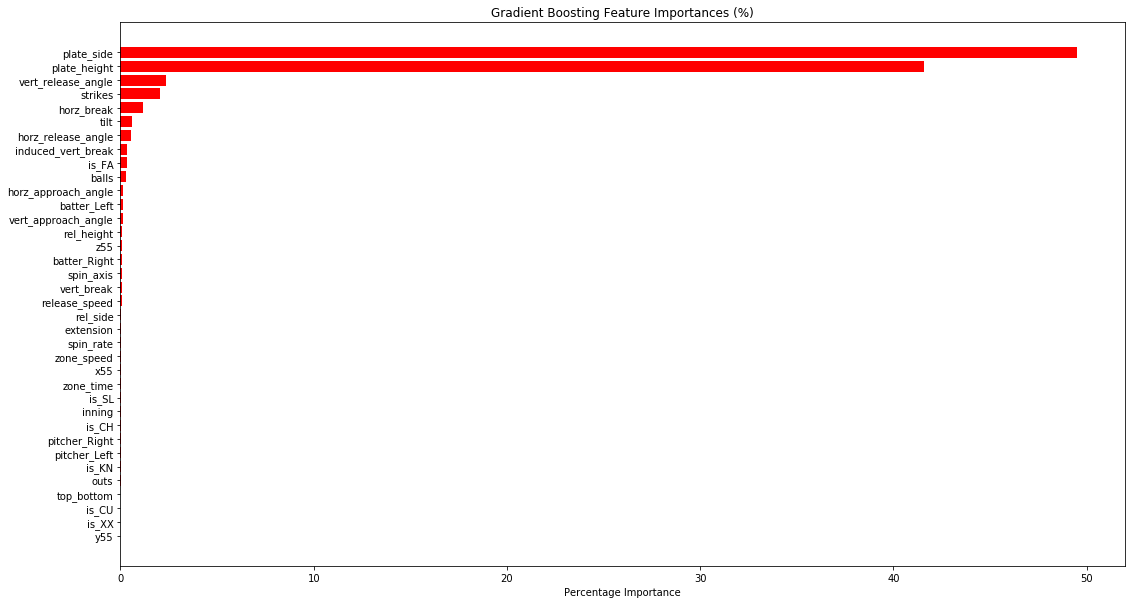

In [26]:
gboost = GradientBoostingClassifier(n_estimators=1000, random_state=11, verbose=1)
gboost.fit(X_train, y_train)
y_pred = gboost.predict(X_test)

print(f'Gboost train accuracy: {gboost.score(X_train, y_train)}')
print(f'Gboost test accuracy:  {gboost.score(X_test, y_test)}')
print('\n')
print(classification_report(y_test, y_pred))

feature_importances = pd.DataFrame(pd.Series(gboost.feature_importances_), columns=['Importance'])
feature_importances.index = X_train.columns
feature_importances = feature_importances.sort_values('Importance')

plt.figure(figsize=(18,10))
plt.barh(feature_importances.index, width=feature_importances['Importance'] * 100, color='r')
plt.title("Gradient Boosting Feature Importances (%)")
plt.xlabel('Percentage Importance')
plt.show()

In [34]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('y_pred.csv')

In [29]:
y_probs = gboost.predict_proba(X_test)
y_probs = y_probs[:, 1]

gboost_precision, gboost_recall, _ = precision_recall_curve(y_test, y_probs)

print(f'Gradient Boosting AUC Score: {auc(gboost_recall, gboost_precision)}')

Gradient Boosting AUC Score: 0.9699183779450761


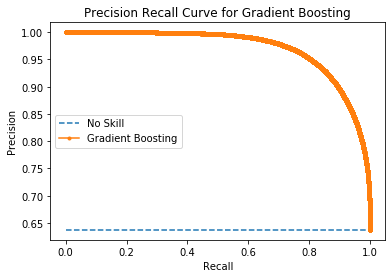

In [35]:
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(gboost_recall, gboost_precision, marker='.', label='Gradient Boosting')
plt.title('Precision Recall Curve for Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [33]:
print(f'Matthew\'s Correlation Coefficient: {matthews_corrcoef(y_test, y_pred)}')

Matthew's Correlation Coefficient: 0.7173574995833374


## Making predictions on test set

In [37]:
test_df = pd.read_csv('../Data/2020-test.csv')

In [81]:
def clean_and_wrangle(df):
    
    df = df.drop(df[df['release_speed'].isnull()].index)
    df = df.drop(df[df['outs'].isnull()].index)
    df['spin_rate'].fillna(df['spin_rate'].mean(), inplace=True)
    df = df.drop(df[df['tilt'].isnull()].index)
    df = df.drop(df[df['pitch_type'].isnull()].index)
    df = df.reset_index().drop('index', axis=1)
    
    df['tilt'] = df['tilt'].map(lambda x: sum(a*int(t) for a, t in zip([3600, 60], x.split(':'))) \
                                          if ':' in x else int(x[:-5]))
    return df

In [82]:
test_df = clean_and_wrangle(test_df)

In [84]:
test_df.head(10)

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,is_strike,pitch_id
0,d3396348,Left,d9b3bce2,Right,501b6728,a63083b5,c338c856,8,1,2.0,...,85.462196,-5.52951,0.682682,0.411072,2.65519,55,6.30581,FA,NaN,f2204560
1,4c807a49,Left,4aafd18a,Right,8d1f4cfc,93c9014b,97c420bc,1,2,1.0,...,76.937698,-7.24994,0.617254,0.446388,2.05217,55,5.89617,CH,NaN,4a16102e
2,18182a03,Right,c790fbeb,Left,075be90a,9c02aab4,568a8108,6,2,1.0,...,83.710899,-7.12427,-4.845640,0.421318,-1.78613,55,5.93421,SL,NaN,73ffabd3
3,94a20652,Right,bf921933,Right,934c75c6,043de890,5e710b9e,5,1,1.0,...,85.949799,-5.92277,-3.132810,0.400539,-1.56069,55,5.44192,FA,NaN,60ed54c3
4,4f3062b6,Left,65df5b42,Right,c9712626,d057fd71,00ae6fb5,3,1,1.0,...,85.592598,-7.10051,1.461540,0.406034,2.15070,55,6.43411,FA,NaN,5d720732
5,3903adfd,Right,13448018,Left,45b7bf7c,1ce4b3e6,fbc0970f,5,1,1.0,...,83.406601,-5.14624,0.550966,0.412397,-2.45849,55,6.32671,FA,NaN,4aa772e1
6,d9b3bce2,Right,1817dec7,Left,075be90a,0c8846f2,370c45c8,7,1,0.0,...,84.818802,-4.38852,-1.782670,0.405944,-2.91866,55,5.86711,FA,NaN,debae10c
7,06e0842e,Left,730d2dbf,Left,20418ce9,852c6a22,65b01821,6,2,1.0,...,82.629601,-5.51211,1.447130,0.423868,2.04815,55,5.84246,FA,NaN,c71b9d22
8,fe5717f2,Right,44c206bb,Right,fe6b0f40,16750c18,62542678,6,1,2.0,...,86.618500,-4.40207,-0.125200,0.397941,-1.50450,55,6.53886,FA,NaN,fd77d5fb
9,7fa6b7cb,Right,e5fe8773,Left,d0d69f32,c4c41d26,9d29b427,5,2,0.0,...,85.491203,-6.62900,-0.512073,0.403582,-2.67956,55,5.61784,FA,NaN,c43cd8b2


In [83]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145097 entries, 0 to 145096
Data columns (total 36 columns):
pitcher_id             145097 non-null object
pitcher_side           145097 non-null object
batter_id              145097 non-null object
batter_side            145097 non-null object
stadium_id             145097 non-null object
umpire_id              145097 non-null object
catcher_id             145097 non-null object
inning                 145097 non-null int64
top_bottom             145097 non-null int64
outs                   145097 non-null float64
balls                  145097 non-null int64
strikes                145097 non-null int64
release_speed          145097 non-null float64
vert_release_angle     145097 non-null float64
horz_release_angle     145097 non-null float64
spin_rate              145097 non-null float64
spin_axis              145097 non-null float64
tilt                   145097 non-null int64
rel_height             145097 non-null float64
rel_side     

In [90]:
X = test_df.drop(['pitcher_id', 'batter_id', 'stadium_id', 'umpire_id', 'catcher_id', 'is_strike', 'pitch_id'], axis=1)

X = pd.get_dummies(X, prefix=['pitcher', 'batter', 'is'], columns=['pitcher_side', 'batter_side', 'pitch_type'])

In [91]:
predictions = gboost.predict(X)

In [96]:
test_df['is_strike'] = predictions
test_df.head(10)

,pitcher_id,pitcher_side,batter_id,batter_side,stadium_id,umpire_id,catcher_id,inning,top_bottom,outs,...,zone_speed,vert_approach_angle,horz_approach_angle,zone_time,x55,y55,z55,pitch_type,is_strike,pitch_id
0,d3396348,Left,d9b3bce2,Right,501b6728,a63083b5,c338c856,8,1,2.0,...,85.462196,-5.52951,0.682682,0.411072,2.65519,55,6.30581,FA,0,f2204560
1,4c807a49,Left,4aafd18a,Right,8d1f4cfc,93c9014b,97c420bc,1,2,1.0,...,76.937698,-7.24994,0.617254,0.446388,2.05217,55,5.89617,CH,1,4a16102e
2,18182a03,Right,c790fbeb,Left,075be90a,9c02aab4,568a8108,6,2,1.0,...,83.710899,-7.12427,-4.845640,0.421318,-1.78613,55,5.93421,SL,0,73ffabd3
3,94a20652,Right,bf921933,Right,934c75c6,043de890,5e710b9e,5,1,1.0,...,85.949799,-5.92277,-3.132810,0.400539,-1.56069,55,5.44192,FA,0,60ed54c3
4,4f3062b6,Left,65df5b42,Right,c9712626,d057fd71,00ae6fb5,3,1,1.0,...,85.592598,-7.10051,1.461540,0.406034,2.15070,55,6.43411,FA,1,5d720732
5,3903adfd,Right,13448018,Left,45b7bf7c,1ce4b3e6,fbc0970f,5,1,1.0,...,83.406601,-5.14624,0.550966,0.412397,-2.45849,55,6.32671,FA,0,4aa772e1
6,d9b3bce2,Right,1817dec7,Left,075be90a,0c8846f2,370c45c8,7,1,0.0,...,84.818802,-4.38852,-1.782670,0.405944,-2.91866,55,5.86711,FA,1,debae10c
7,06e0842e,Left,730d2dbf,Left,20418ce9,852c6a22,65b01821,6,2,1.0,...,82.629601,-5.51211,1.447130,0.423868,2.04815,55,5.84246,FA,1,c71b9d22
8,fe5717f2,Right,44c206bb,Right,fe6b0f40,16750c18,62542678,6,1,2.0,...,86.618500,-4.40207,-0.125200,0.397941,-1.50450,55,6.53886,FA,1,fd77d5fb
9,7fa6b7cb,Right,e5fe8773,Left,d0d69f32,c4c41d26,9d29b427,5,2,0.0,...,85.491203,-6.62900,-0.512073,0.403582,-2.67956,55,5.61784,FA,1,c43cd8b2
